# Лабораторна робота № 4
Бодруг Петро ОІ-31

## Вступний код

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

import warnings
warnings.simplefilter('ignore')
ds =pd.read_csv('changed.csv')

## Вибір ознак


In [158]:
y_column = ['Status'] # target variable
X_columns = ['loan_limit', 'approv_in_adv',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount',
       'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type',
       'total_units', 'income',
       'Credit_Score', 'submission_of_application', 'LTV',
       'Gender_Joint', 'Gender_Male', 'Gender_Sex Not Available',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3', 'loan_purpose_p4',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP', 'co-applicant_credit_type_EXP',
       'age', 'Region_central',
       'Region_south']
X = ds[X_columns]
y = ds[y_column]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [160]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     33299
           1       0.82      0.50      0.62     10897

    accuracy                           0.85     44196
   macro avg       0.84      0.73      0.76     44196
weighted avg       0.85      0.85      0.84     44196



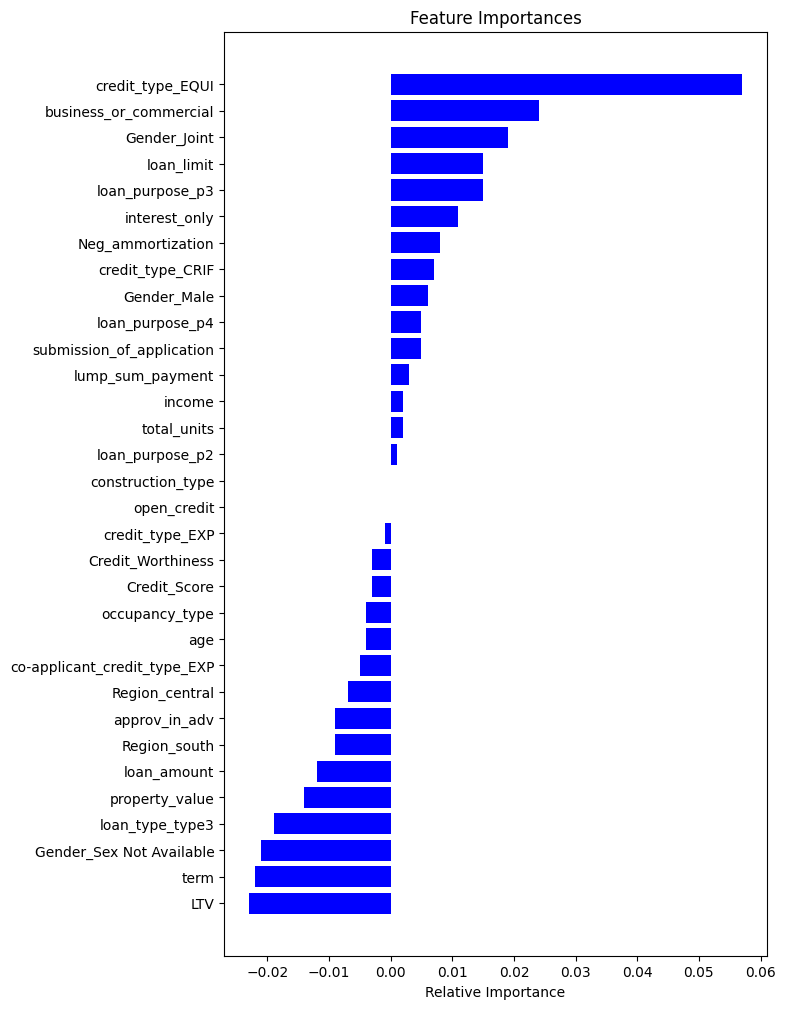

In [112]:
from sklearn.inspection import permutation_importance

# Оцінка важливості ознак за допомогою пермутаційної важливості
result = permutation_importance(kn_classifier, X[:100], y[:100], n_repeats=10, random_state=42)

# Отримання важливостей та індексів
importances = result.importances_mean
indices = np.argsort(importances)

# Візуалізація
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [2]:
y_column = ['Status'] # target variable
X_columns = ['loan_limit', 
       'Credit_Worthiness', 'business_or_commercial',
       'loan_amount',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment','occupancy_type',
       'income',
       'Credit_Score', 'submission_of_application',
       'Gender_Male',
       'loan_type_type3', 'loan_purpose_p3', 'loan_purpose_p4',
       'credit_type_EQUI', 'credit_type_EXP', 'co-applicant_credit_type_EXP',
       'age',
       ]
X = ds[X_columns]
y = ds[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [3]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33299
           1       0.77      0.59      0.67     10897

    accuracy                           0.86     44196
   macro avg       0.83      0.77      0.79     44196
weighted avg       0.85      0.86      0.85     44196



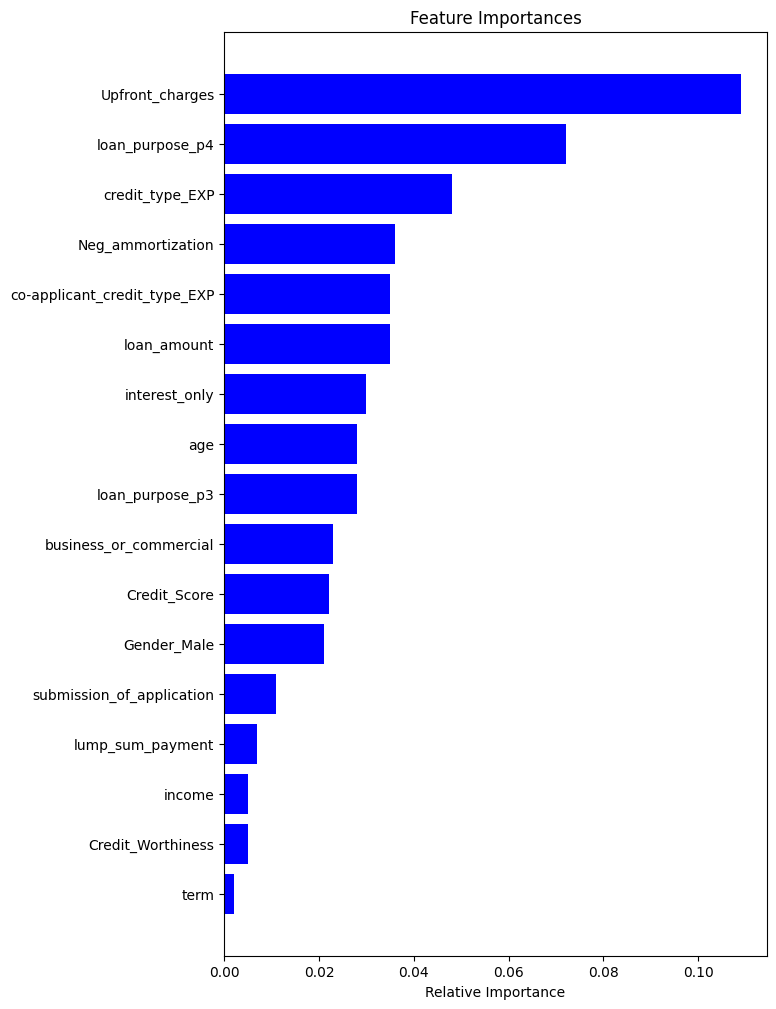

In [190]:
from sklearn.inspection import permutation_importance

# Оцінка важливості ознак за допомогою пермутаційної важливості
result = permutation_importance(kn_classifier, X[:100], y[:100], n_repeats=10, random_state=42)

# Отримання важливостей та індексів
importances = result.importances_mean
indices = np.argsort(importances)

# Візуалізація
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Вибір метрик
Для бізнесу важливо як не пропустити жодного ризикового клієнта так і уникнути помилкових відмов, тобто  відмовити надійним клієнтам. Тому для оцінки я використовуватиму F-1 міру.

## Метод оптимізації параметрів
Для оптимізаці гіперпараметрів я обрав randomized search адже він швидчий та не перевіряє всі комбінації параметрів.


даний метод має такі гіперпараметри

In [123]:
kn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

з них я буду змінювати :
* n_neighbors: 3 - 20
* leaf_size: 5- 50
* weights: uniform, distance
* metric: euclidean, manhattan, chebyshev
* p: 1, 2
* algorithm: auto

p: Параметр, який визначає порядок метрики Мінкевського. Якщо p=1, це буде манхеттенська відстань; якщо p=2, це буде евклідна відстань.

leaf_size: Визначає розмір листя для алгоритму, що використовує структури даних (наприклад, kd-tree) для зберігання сусідів.

algiritm:Алгоритм, який використовується для обчислення найближчих сусідів. Значення можуть бути auto, ball_tree, kd_tree, brute.


## Оптимізація гіперпараметрів моделі та вибір оптимальних

In [126]:
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
knn = KNeighborsClassifier()

# Визначення простору гіперпараметрів
param_dist = {
    'n_neighbors': randint(3, 20),
    'weights': ['distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
    'p': [1, 2],
    'leaf_size': randint(5, 50),
    'algorithm': ['auto']
}

# Виконання Randomized Search
random_search = RandomizedSearchCV( estimator=knn,
                                    param_distributions=param_dist,
                                    n_iter=30, 
                                    scoring='f1',
                                    verbose = 3,
                                    cv=5,
                                    random_state=42)

# Підготовка даних
X = ds[X_columns]  # Ваші особливості
y = ds[y_column]   # Ваші мітки

# Навчання моделі
random_search.fit(X, y)

# Виведення кращих параметрів
print("Best parameters:", random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END algorithm=auto, leaf_size=43, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.565 total time=  16.9s
[CV 2/5] END algorithm=auto, leaf_size=43, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.567 total time=  17.5s
[CV 3/5] END algorithm=auto, leaf_size=43, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.565 total time=  16.6s
[CV 4/5] END algorithm=auto, leaf_size=43, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.570 total time=  16.5s
[CV 5/5] END algorithm=auto, leaf_size=43, metric=euclidean, n_neighbors=17, p=1, weights=distance;, score=0.570 total time=  19.2s
[CV 1/5] END algorithm=auto, leaf_size=12, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.583 total time=  17.9s
[CV 2/5] END algorithm=auto, leaf_size=12, metric=euclidean, n_neighbors=9, p=2, weights=distance;, score=0.584 total time=  17.7s
[CV 3/5] END alg

In [127]:
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'algorithm': 'auto', 'leaf_size': 14, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best score: 0.6643151687742146


In [132]:
random_search_results = pd.concat([
    pd.DataFrame(random_search.cv_results_["params"]),
    pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["f1"])
], axis=1)

# Виведення результатів
random_search_results

,algorithm,leaf_size,metric,n_neighbors,p,weights,f1
0,auto,43,euclidean,17,1,distance,0.567585
1,auto,12,euclidean,9,2,distance,0.588043
2,auto,23,chebyshev,13,1,distance,0.484120
3,auto,28,euclidean,6,2,distance,0.597939
4,auto,28,chebyshev,4,2,distance,0.533443
5,auto,48,manhattan,8,2,distance,0.663882
6,auto,25,euclidean,14,2,distance,0.574377
7,auto,26,euclidean,14,1,distance,0.574377
8,auto,31,chebyshev,12,2,distance,0.490076
9,auto,32,chebyshev,17,2,distance,0.471837


In [133]:
random_search_results.columns

Index(['algorithm', 'leaf_size', 'metric', 'n_neighbors', 'p', 'weights',
       'f1'],
      dtype='object')

In [4]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     33299
           1       0.77      0.59      0.67     10897

    accuracy                           0.86     44196
   macro avg       0.83      0.77      0.79     44196
weighted avg       0.85      0.86      0.85     44196



In [5]:
kn_classifier = KNeighborsClassifier(leaf_size=14,metric='manhattan',n_neighbors=6,p=2,weights='distance')
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     33299
           1       0.79      0.65      0.71     10897

    accuracy                           0.87     44196
   macro avg       0.84      0.80      0.82     44196
weighted avg       0.87      0.87      0.87     44196



## Балансування класів
Для балансування я обрав SMOTE (Synthetic Minority Oversampling Technique)


In [6]:

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
kn_classifier = KNeighborsClassifier(leaf_size=14,metric='manhattan',n_neighbors=6,p=2,weights='distance')
kn_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.87     33299
           1       0.60      0.80      0.68     10897

    accuracy                           0.82     44196
   macro avg       0.76      0.81      0.78     44196
weighted avg       0.85      0.82      0.83     44196



## Висновок

Під час лабораторної роботи я визначився(randomised search) з оптимальними гіперпараметрами('algorithm': 'auto', 'leaf_size': 14, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 2, 'weights': 'distance') для покращення  точністі прогнозування та змення ризику перенавчання або недонавчання моделі(knn). Крім того я провів балансування класів(smote)  чим  покращив recall моделі .